# R-DESeq2 Analysis Paired End data

## Data Check

In [3]:
import pandas as pd
import os

In [4]:
def env_var(envar, var):
    import os
    os.environ[envar] = var
    return


def is_gzipped_content(file_path):
    try:
        with open(file_path, 'rb') as f:
            # Read the first two bytes to check for the gzip magic number
            magic_number = f.read(2)
            return magic_number == b'\x1f\x8b'
    except OSError:
        return False
    
    
#print(refGenomePath)
#jobIdxPE + '/RefGenome.fa'
def decompress_gzipped(org, dest):
    os.system('gzip -d ' + org + ' -c > ' + dest)
    return

In [5]:
PEPath = "/mnt/d/PE/Avena/"
jobIdxPE = "AvenaSub1.5M-RNASeq-PE"
env_var("PEPath", PEPath)
env_var("jobIdxPE", jobIdxPE)

In [6]:
os.chdir(PEPath)

In [7]:
!echo $PEPath
!echo $jobIdxPE

/mnt/d/PE/Avena/
AvenaSub1.5M-RNASeq-PE


In [8]:
metaPE = pd.read_csv(PEPath + jobIdxPE + "/metadata.csv", sep = ',')
display(metaPE)

,file1,file2,type,shortName,meta1,meta2,meta3,replicate,trimmed1,trimmed2
0,sub1.5M-Ctrl_Estres_R1_1.fastq.gz,sub1.5M-Ctrl_Estres_R1_2.fastq.gz,paired,cont_estres_R1,Estres,Inoculado,A,1,sub1.5M-Ctrl_Estres_R1_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R1_2_paired.fastq.gz
1,sub1.5M-Ctrl_Estres_R2_1.fastq.gz,sub1.5M-Ctrl_Estres_R2_2.fastq.gz,paired,cont_estres_R2,Estres,Inoculado,A,2,sub1.5M-Ctrl_Estres_R2_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R2_2_paired.fastq.gz
2,sub1.5M-Ctrll_Estres_R3_1.fastq.gz,sub1.5M-Ctrll_Estres_R3_2.fastq.gz,paired,cont_estres_R3,Estres,Inoculado,A,3,sub1.5M-Ctrll_Estres_R3_1_paired.fastq.gz,sub1.5M-Ctrll_Estres_R3_2_paired.fastq.gz
3,sub1.5M-Control_R1_1.fastq.gz,sub1.5M-Control_R1_2.fastq.gz,paired,control_R1,Control,No_inoculado,B,1,sub1.5M-Control_R1_1_paired.fastq.gz,sub1.5M-Control_R1_2_paired.fastq.gz
4,sub1.5M-Control_R2_1.fastq.gz,sub1.5M-Control_R2_2.fastq.gz,paired,control_R2,Control,No_inoculado,B,2,sub1.5M-Control_R2_1_paired.fastq.gz,sub1.5M-Control_R2_2_paired.fastq.gz
5,sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz,paired,ctrl_N7_XT17_R1,Control,Inoculado,C,1,sub1.5M-Ctrl_N7_XT17_R1_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2_paired.fastq.gz
6,sub1.5M-Ctrl_N7_XT17_R2_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz,paired,ctrl_N7_XT17_R2,Control,Inoculado,C,2,sub1.5M-Ctrl_N7_XT17_R2_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2_paired.fastq.gz
7,sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz,paired,ctrl_N7_XT17_R3,Control,Inoculado,C,3,sub1.5M-Ctrl_N7_XT17_R3_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2_paired.fastq.gz
8,sub1.5M-Estre_N7XT17_R1_1.fastq.gz,sub1.5M-Estre_N7XT17_R1_2.fastq.gz,paired,estres_N7_XT17_R1,Estres,No_inoculado,D,1,sub1.5M-Estre_N7XT17_R1_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R1_2_paired.fastq.gz
9,sub1.5M-Estre_N7XT17_R2_1.fastq.gz,sub1.5M-Estre_N7XT17_R2_2.fastq.gz,paired,estres_N7_XT17_R2,Estres,No_inoculado,D,2,sub1.5M-Estre_N7XT17_R2_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R2_2_paired.fastq.gz


In [9]:
os.system("mkdir -p " + PEPath + jobIdxPE + "/05-featureCounts")

0

In [10]:
!ls -ltrh $PEPath

total 4.8G
-rwxrwxrwx 1 ddelgadillo ddelgadillo   94 May 29 22:00 TruSeq3-PE.fa
-rwxrwxrwx 1 ddelgadillo ddelgadillo  478 Jul  4 09:45 Avena_codata.csv
-rwxrwxrwx 1 ddelgadillo ddelgadillo 117M Jul  4 09:50 sub1.5M-Estre_N7XT17_R3_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 111M Jul  4 09:51 sub1.5M-Estre_N7XT17_R3_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 115M Jul  4 09:51 sub1.5M-Estre_N7XT17_R2_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 108M Jul  4 09:52 sub1.5M-Estre_N7XT17_R2_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 118M Jul  4 09:52 sub1.5M-Estre_N7XT17_R1_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 110M Jul  4 09:53 sub1.5M-Estre_N7XT17_R1_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 115M Jul  4 09:54 sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 109M Jul  4 09:54 sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 114M Jul  4 09:55 sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 1

In [11]:
!tree -d

.
└── AvenaSub1.5M-RNASeq-PE
    ├── 01-QC-Pre-Reports
    │   └── multiqc_data
    ├── 02-Trimming-Trimmomatic
    │   ├── summary
    │   └── unpaired
    ├── 03-QC-Pos-Reports
    │   └── multiqc_data
    ├── 04-RefGenome-Alignments-Hisat2
    │   └── index
    ├── 04-RefGenome-Alignments-Kallisto
    │   └── log
    ├── 04.1-Gene-Transcripts-Assembly-Quantify-Stringtie
    │   └── ballgown
    │       ├── cont_estres_R1
    │       ├── cont_estres_R2
    │       ├── cont_estres_R3
    │       ├── control_R1
    │       ├── control_R2
    │       ├── ctrl_N7_XT17_R1
    │       ├── ctrl_N7_XT17_R2
    │       ├── ctrl_N7_XT17_R3
    │       ├── estres_N7_XT17_R1
    │       ├── estres_N7_XT17_R2
    │       └── estres_N7_XT17_R3
    ├── 05-featureCounts
    └── raw

27 directories


## Standard Workflow
### Feature Count

In [12]:
refGenomeGFFAnnotationPath = jobIdxPE + '/RefGenomeAnn.gff'
refGenomeGTFAnnotationPath = jobIdxPE + '/RefGenomeAnn.gtf'

In [13]:
!featureCounts -h

featureCounts: invalid option -- 'h'

Version 2.0.6

Usage: featureCounts [options] -a <annotation_file> -o <output_file> input_file1 [input_file2] ... 

## Mandatory arguments:

  -a <string>         Name of an annotation file. GTF/GFF format by default. See
                      -F option for more format information. Inbuilt annotations
                      (SAF format) is available in 'annotation' directory of the
                      package. Gzipped file is also accepted.

  -o <string>         Name of output file including read counts. A separate file
                      including summary statistics of counting results is also
                      included in the output ('<string>.summary'). Both files
                      are in tab delimited format.

  input_file1 [input_file2] ...   A list of SAM or BAM format files. They can be
                      either name or location sorted. If no files provided,
                      <stdin> input is expected. Location-sorted pai

In [14]:
nThreads = '8'

In [15]:
#!cat ids.txt | parallel -j 1 echo "bam/{}.bam" | xargs featureCounts -p -a refs/features.gff -o counts.txt

cmdFC = "featureCounts -p -T " + nThreads + " -o " + PEPath + jobIdxPE + "/05-featureCounts/rawCounts -a " +  PEPath + jobIdxPE + "/RefGenomeAnn.gtf"  
for i in metaPE.index:
    #print(metaPE.shortName[i])
    cmdFC += " " + PEPath + jobIdxPE + "/04-RefGenome-Alignments-Hisat2/" + metaPE.shortName[i] + ".bam"

os.system(cmdFC)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                                                                            ||
||                           cont_estres_R1.bam                               ||
||                           cont_estres_R2.bam                               ||
||                           cont_estres_R3.bam                  

||    Paired-end reads are included.                                          ||
||    The reads are assigned on the single-end mode.                          ||
||    Total alignments : 2739791                                              ||
||    Successfully assigned alignments : 902280 (32.9%)                       ||
||    Running time : 0.09 minutes                                             ||
||                                                                            ||
|| Process BAM file estres_N7_XT17_R3.bam...                                  ||
||    Paired-end reads are included.                                          ||
||    The reads are assigned on the single-end mode.                          ||
||    Total alignments : 2138074                                              ||
||    Successfully assigned alignments : 990132 (46.3%)                       ||
||    Running time : 0.07 minutes                                             ||
||                          

0

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R -i PEPath,jobIdxPE
setwd(paste0(PEPath,jobIdxPE))
list.files()

 [1] "01-QC-Pre-Reports"                                
 [2] "02-Trimming-Trimmomatic"                          
 [3] "03-QC-Pos-Reports"                                
 [4] "04-RefGenome-Alignments-Hisat2"                   
 [5] "04-RefGenome-Alignments-Kallisto"                 
 [6] "04.1-Gene-Transcripts-Assembly-Quantify-Stringtie"
 [7] "05-featureCounts"                                 
 [8] "heatmap24.pdf"                                    
 [9] "metadata.csv"                                     
[10] "raw"                                              
[11] "RefGenome.fa"                                     
[12] "RefGenome.fa.fai"                                 
[13] "RefGenomeAnn.gff"                                 
[14] "RefGenomeAnn.gtf"                                 


In [18]:
%%R
counts_file <- "05-featureCounts/rawCounts"
df <- read.table(counts_file, header=TRUE)
head(df)

                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

1                                                                                                                                                                                                                                                                                                                                                                                                                                     +;+;+
2                                                                                                                                                                                                                                                                                                                                                                                                       +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
3                                                                                                                                               

In [19]:
%%R
design_file = "metadata.csv"
sample_data <- read.csv(design_file, stringsAsFactors=F)
head(sample_data)

                               file1                              file2   type
1  sub1.5M-Ctrl_Estres_R1_1.fastq.gz  sub1.5M-Ctrl_Estres_R1_2.fastq.gz paired
2  sub1.5M-Ctrl_Estres_R2_1.fastq.gz  sub1.5M-Ctrl_Estres_R2_2.fastq.gz paired
3 sub1.5M-Ctrll_Estres_R3_1.fastq.gz sub1.5M-Ctrll_Estres_R3_2.fastq.gz paired
4      sub1.5M-Control_R1_1.fastq.gz      sub1.5M-Control_R1_2.fastq.gz paired
5      sub1.5M-Control_R2_1.fastq.gz      sub1.5M-Control_R2_2.fastq.gz paired
6 sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz paired
        shortName   meta1        meta2 meta3 replicate
1  cont_estres_R1  Estres    Inoculado     A         1
2  cont_estres_R2  Estres    Inoculado     A         2
3  cont_estres_R3  Estres    Inoculado     A         3
4      control_R1 Control No_inoculado     B         1
5      control_R2 Control No_inoculado     B         2
6 ctrl_N7_XT17_R1 Control    Inoculado     C         1
                                   trimmed1
1  sub1.5M-Ctrl_Es

In [20]:
%%R
design_file = "metadata.csv"
sample_data <- read.csv(design_file, stringsAsFactors=F)
head(sample_data)


                               file1                              file2   type
1  sub1.5M-Ctrl_Estres_R1_1.fastq.gz  sub1.5M-Ctrl_Estres_R1_2.fastq.gz paired
2  sub1.5M-Ctrl_Estres_R2_1.fastq.gz  sub1.5M-Ctrl_Estres_R2_2.fastq.gz paired
3 sub1.5M-Ctrll_Estres_R3_1.fastq.gz sub1.5M-Ctrll_Estres_R3_2.fastq.gz paired
4      sub1.5M-Control_R1_1.fastq.gz      sub1.5M-Control_R1_2.fastq.gz paired
5      sub1.5M-Control_R2_1.fastq.gz      sub1.5M-Control_R2_2.fastq.gz paired
6 sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz paired
        shortName   meta1        meta2 meta3 replicate
1  cont_estres_R1  Estres    Inoculado     A         1
2  cont_estres_R2  Estres    Inoculado     A         2
3  cont_estres_R3  Estres    Inoculado     A         3
4      control_R1 Control No_inoculado     B         1
5      control_R2 Control No_inoculado     B         2
6 ctrl_N7_XT17_R1 Control    Inoculado     C         1
                                   trimmed1
1  sub1.5M-Ctrl_Es

In [21]:
%%R
condition <- "meta1"

In [22]:
%%R
sample_data[,condition]

 [1] "Estres"  "Estres"  "Estres"  "Control" "Control" "Control" "Control"
 [8] "Control" "Estres"  "Estres"  "Estres" 


In [23]:
%%R
sample_data$condition <- factor(sample_data[,condition])
sample_data$condition <- relevel(sample_data$condition, toString(sample_data$condition[1]))

counts <- df[ ,c(1, 7:length(names(df)))]
head(counts)

                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R1.bam
1                                                                                         0
2                                                                                         0
3                                                                                        57
4                                                                                         0
5                                                                                        76
6                                                                                         3
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R2.bam
1                                                            

In [24]:
%%R
names(counts) <- c("name", sample_data$shortName)
head(counts)

                        name cont_estres_R1 cont_estres_R2 cont_estres_R3
1 AVESA.00001b.r3.1Ag0000001              0              0              0
2 AVESA.00001b.r3.1Ag0000002              0              0              0
3 AVESA.00001b.r3.1Ag0000003             57             40             40
4 AVESA.00001b.r3.1Ag0000004              0              0              0
5 AVESA.00001b.r3.1Ag0000005             76             98            138
6 AVESA.00001b.r3.1Ag0000006              3              5             11
  control_R1 control_R2 ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3
1          0          0               0               0               0
2          0          0               0               2               0
3         16         38              32              29              37
4          0          0               2               0               0
5         44        110              22              67              45
6          4          4               0           

In [25]:
%%R
output_file = "05-featureCounts/counts.csv"
write.csv(counts, file=output_file, row.names=FALSE, quote=FALSE)

In [26]:
%%R
colData <- dplyr::select(sample_data,shortName)
#colData$sample <- sample_data$shortName
colData$condition <- factor(sample_data$condition)
colData$condition = relevel(colData$condition, toString(colData$condition[1]))
head(colData)

        shortName condition
1  cont_estres_R1    Estres
2  cont_estres_R2    Estres
3  cont_estres_R3    Estres
4      control_R1   Control
5      control_R2   Control
6 ctrl_N7_XT17_R1   Control


In [27]:
%%R

sample_names <- sample_data$shortName
countData <- round(counts[, sample_names])
head(countData)

  cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
1              0              0              0          0          0
2              0              0              0          0          0
3             57             40             40         16         38
4              0              0              0          0          0
5             76             98            138         44        110
6              3              5             11          4          4
  ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
1               0               0               0                 0
2               0               2               0                 0
3              32              29              37                33
4               2               0               0                 0
5              22              67              45               106
6               0               1               5                 0
  estres_N7_XT17_R2 estres_N7_XT17_R3
1  

In [28]:
%%R
otherCols = counts[!(names(counts) %in% sample_names)]
head(otherCols)

                        name
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006


In [29]:
%%R
suppressPackageStartupMessages(library(DESeq2))

dds = DESeqDataSetFromMatrix(countData=countData, colData=colData, design = ~condition)
str(dds)

Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  ..@ design            :Class 'formula'  language ~condition
  .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  ..@ dispersionFunction:function ()  
  ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .

converting counts to integer mode
  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


In [30]:
%%R
dse = DESeq(dds)
res = results(dse)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [31]:
%%R
res

log2 fold change (MLE): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA        NA
2      0.167104      1.5535033  3.149264  0.493291 0.6218070        NA
3     35.282649      0.0614745  0.357213  0.172095 0.8633628  0.969667
4      0.388516      1.5620317  3.148955  0.496048 0.6198607        NA
5     76.949083     -0.5651678  0.273585 -2.065786 0.0388487  0.337856
...         ...            ...       ...       ...       ...       ...
22528   7.86050     -0.2947698  0.489136 -0.602633 0.5467529        NA
22529  10.84603      0.2839364  0.469634  0.604590 0.5454513  0.852317
22530   9.56978     -0.0546504  0.489714 -0.111597 0.9111433  0.977777
22531   6.31608      0.3684979  0.495099  0.744291 0.4567006        NA
22532  

In [32]:
%%R
data = cbind(otherCols, data.frame(res))
data$foldChange = 2 ^ data$log2FoldChange
names(data)[names(data)=="pvalue"] <-"PValue"
names(data)[names(data)=="padj"] <- "FDR"
data$PAdj = p.adjust(data$PValue, method="hochberg")
data = data[with(data, order(PValue, -foldChange)), ]
data$falsePos = 1:nrow(data) * data$FDR

data$baseMeanA = 1
data$baseMeanB = 1

head(data)

                            name baseMean log2FoldChange     lfcSE     stat
11547 AVESA.00001b.r3.4Ag0001489 115.6302       1.373332 0.2120250 6.477218
16995 AVESA.00001b.r3.6Ag0000216 292.6432       2.375452 0.3939438 6.029927
22000 AVESA.00001b.r3.3Ag0001778 443.6070       1.321680 0.2341150 5.645432
16994 AVESA.00001b.r3.6Ag0000215 373.5584       1.445694 0.2570140 5.624964
17559 AVESA.00001b.r3.6Ag0000780 292.1236       1.570771 0.2917545 5.383879
11315 AVESA.00001b.r3.4Ag0001257 134.8757       1.512835 0.2858030 5.293280
            PValue          FDR foldChange         PAdj     falsePos baseMeanA
11547 9.342912e-11 8.198405e-07   2.590683 1.779918e-06 8.198405e-07         1
16995 1.640340e-09 7.196992e-06   5.188984 3.124848e-05 1.439398e-05         1
22000 1.647668e-08 4.070436e-05   2.499570 3.138643e-04 1.221131e-04         1
16994 1.855469e-08 4.070436e-05   2.723939 3.534298e-04 1.628174e-04         1
17559 7.289767e-08 1.279354e-04   2.970634 1.388482e-03 6.396771e-04     

In [33]:
%%R
normed = counts(dse, normalized=TRUE)
normed = round(normed, 1)

In [34]:
%%R
head(normed)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]            0.0            0.0            0.0        0.0        0.0
[2,]            0.0            0.0            0.0        0.0        0.0
[3,]           56.9           36.5           31.8       16.7       37.4
[4,]            0.0            0.0            0.0        0.0        0.0
[5,]           75.9           89.5          109.7       46.0      108.1
[6,]            3.0            4.6            8.7        4.2        3.9
     ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
[1,]             0.0             0.0             0.0               0.0
[2,]             0.0             1.8             0.0               0.0
[3,]            68.4            26.7            33.8              24.2
[4,]             4.3             0.0             0.0               0.0
[5,]            47.0            61.6            41.1              77.7
[6,]             0.0             0.9             4.6               0.0

In [35]:
%%R
dim(normed)

[1] 22532    11


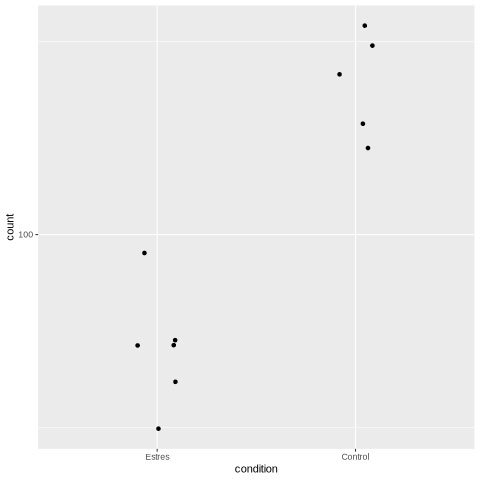

In [36]:
%%R
d <- plotCounts(dse, gene=which.min(res$padj), intgroup="condition", 
                returnData=TRUE)
library("ggplot2")
ggplot(d, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

In [37]:
%%R
vsd <- vst(dse, blind=FALSE)
rld <- rlog(dse, blind=FALSE)
ntd <- normTransform(dds)
head(assay(vsd), 3)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]       2.498394       2.498394       2.498394   2.498394   2.498394
[2,]       2.498394       2.498394       2.498394   2.498394   2.498394
[3,]       6.082714       5.558825       5.404187   4.746171   5.584705
     ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
[1,]        2.498394        2.498394        2.498394          2.498394
[2,]        2.498394        3.310475        2.498394          2.498394
[3,]        6.308834        5.213089        5.470763          5.111575
     estres_N7_XT17_R2 estres_N7_XT17_R3
[1,]          2.498394          2.498394
[2,]          2.498394          2.498394
[3,]          5.421951          5.079609


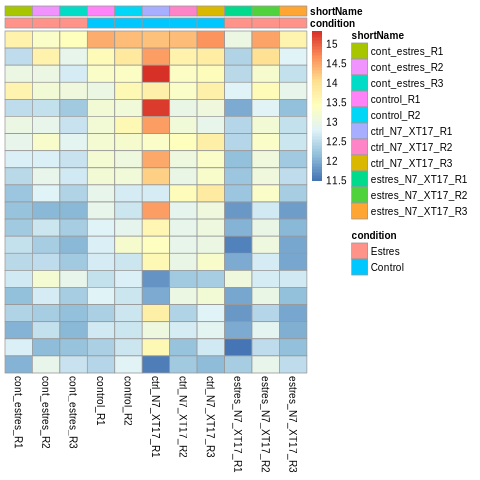

In [39]:
%%R
library("pheatmap")
select <- order(rowMeans(counts(dse,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dse)[,c("condition","shortName")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

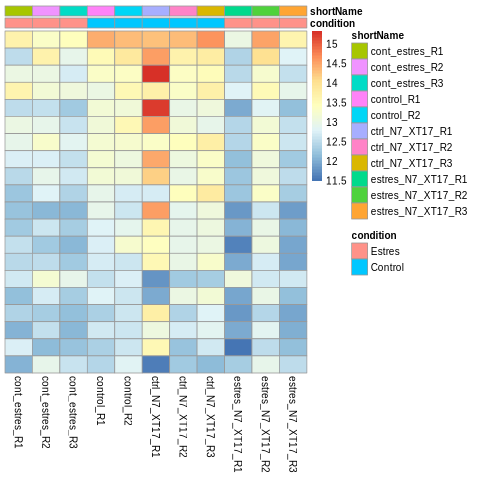

In [40]:
%%R

pheatmap(assay(vsd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

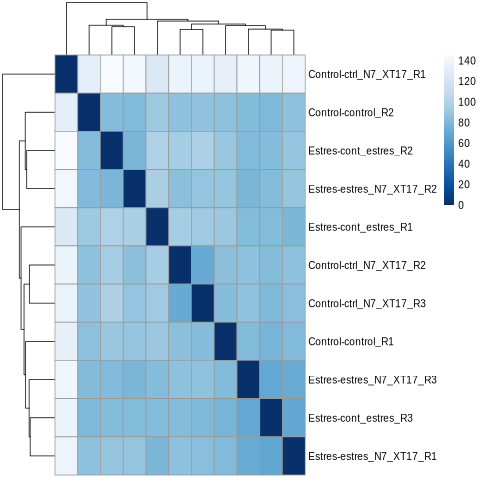

In [41]:
%%R
sampleDists <- dist(t(assay(vsd))) 
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$shortName, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [42]:
%%R
vsd

class: DESeqTransform 
dim: 22532 11 
metadata(1): version
assays(1): ''
rownames: NULL
rowData names(22): baseMean baseVar ... maxCooks dispFit
colnames(11): cont_estres_R1 cont_estres_R2 ... estres_N7_XT17_R2
  estres_N7_XT17_R3
colData names(3): shortName condition sizeFactor


In [ ]:
#ctrl_N7_XT17_R1

In [43]:
display(metaPE)

,file1,file2,type,shortName,meta1,meta2,meta3,replicate,trimmed1,trimmed2
0,sub1.5M-Ctrl_Estres_R1_1.fastq.gz,sub1.5M-Ctrl_Estres_R1_2.fastq.gz,paired,cont_estres_R1,Estres,Inoculado,A,1,sub1.5M-Ctrl_Estres_R1_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R1_2_paired.fastq.gz
1,sub1.5M-Ctrl_Estres_R2_1.fastq.gz,sub1.5M-Ctrl_Estres_R2_2.fastq.gz,paired,cont_estres_R2,Estres,Inoculado,A,2,sub1.5M-Ctrl_Estres_R2_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R2_2_paired.fastq.gz
2,sub1.5M-Ctrll_Estres_R3_1.fastq.gz,sub1.5M-Ctrll_Estres_R3_2.fastq.gz,paired,cont_estres_R3,Estres,Inoculado,A,3,sub1.5M-Ctrll_Estres_R3_1_paired.fastq.gz,sub1.5M-Ctrll_Estres_R3_2_paired.fastq.gz
3,sub1.5M-Control_R1_1.fastq.gz,sub1.5M-Control_R1_2.fastq.gz,paired,control_R1,Control,No_inoculado,B,1,sub1.5M-Control_R1_1_paired.fastq.gz,sub1.5M-Control_R1_2_paired.fastq.gz
4,sub1.5M-Control_R2_1.fastq.gz,sub1.5M-Control_R2_2.fastq.gz,paired,control_R2,Control,No_inoculado,B,2,sub1.5M-Control_R2_1_paired.fastq.gz,sub1.5M-Control_R2_2_paired.fastq.gz
5,sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz,paired,ctrl_N7_XT17_R1,Control,Inoculado,C,1,sub1.5M-Ctrl_N7_XT17_R1_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2_paired.fastq.gz
6,sub1.5M-Ctrl_N7_XT17_R2_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz,paired,ctrl_N7_XT17_R2,Control,Inoculado,C,2,sub1.5M-Ctrl_N7_XT17_R2_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2_paired.fastq.gz
7,sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz,paired,ctrl_N7_XT17_R3,Control,Inoculado,C,3,sub1.5M-Ctrl_N7_XT17_R3_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2_paired.fastq.gz
8,sub1.5M-Estre_N7XT17_R1_1.fastq.gz,sub1.5M-Estre_N7XT17_R1_2.fastq.gz,paired,estres_N7_XT17_R1,Estres,No_inoculado,D,1,sub1.5M-Estre_N7XT17_R1_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R1_2_paired.fastq.gz
9,sub1.5M-Estre_N7XT17_R2_1.fastq.gz,sub1.5M-Estre_N7XT17_R2_2.fastq.gz,paired,estres_N7_XT17_R2,Estres,No_inoculado,D,2,sub1.5M-Estre_N7XT17_R2_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R2_2_paired.fastq.gz


In [47]:
metaPE.drop(metaPE[metaPE['shortName'] == "ctrl_N7_XT17_R1"].index, inplace = True)
metaPE = metaPE.reset_index()
display(metaPE)

,index,file1,file2,type,shortName,meta1,meta2,meta3,replicate,trimmed1,trimmed2
0,0,sub1.5M-Ctrl_Estres_R1_1.fastq.gz,sub1.5M-Ctrl_Estres_R1_2.fastq.gz,paired,cont_estres_R1,Estres,Inoculado,A,1,sub1.5M-Ctrl_Estres_R1_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R1_2_paired.fastq.gz
1,1,sub1.5M-Ctrl_Estres_R2_1.fastq.gz,sub1.5M-Ctrl_Estres_R2_2.fastq.gz,paired,cont_estres_R2,Estres,Inoculado,A,2,sub1.5M-Ctrl_Estres_R2_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R2_2_paired.fastq.gz
2,2,sub1.5M-Ctrll_Estres_R3_1.fastq.gz,sub1.5M-Ctrll_Estres_R3_2.fastq.gz,paired,cont_estres_R3,Estres,Inoculado,A,3,sub1.5M-Ctrll_Estres_R3_1_paired.fastq.gz,sub1.5M-Ctrll_Estres_R3_2_paired.fastq.gz
3,3,sub1.5M-Control_R1_1.fastq.gz,sub1.5M-Control_R1_2.fastq.gz,paired,control_R1,Control,No_inoculado,B,1,sub1.5M-Control_R1_1_paired.fastq.gz,sub1.5M-Control_R1_2_paired.fastq.gz
4,4,sub1.5M-Control_R2_1.fastq.gz,sub1.5M-Control_R2_2.fastq.gz,paired,control_R2,Control,No_inoculado,B,2,sub1.5M-Control_R2_1_paired.fastq.gz,sub1.5M-Control_R2_2_paired.fastq.gz
5,6,sub1.5M-Ctrl_N7_XT17_R2_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz,paired,ctrl_N7_XT17_R2,Control,Inoculado,C,2,sub1.5M-Ctrl_N7_XT17_R2_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2_paired.fastq.gz
6,7,sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz,paired,ctrl_N7_XT17_R3,Control,Inoculado,C,3,sub1.5M-Ctrl_N7_XT17_R3_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2_paired.fastq.gz
7,8,sub1.5M-Estre_N7XT17_R1_1.fastq.gz,sub1.5M-Estre_N7XT17_R1_2.fastq.gz,paired,estres_N7_XT17_R1,Estres,No_inoculado,D,1,sub1.5M-Estre_N7XT17_R1_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R1_2_paired.fastq.gz
8,9,sub1.5M-Estre_N7XT17_R2_1.fastq.gz,sub1.5M-Estre_N7XT17_R2_2.fastq.gz,paired,estres_N7_XT17_R2,Estres,No_inoculado,D,2,sub1.5M-Estre_N7XT17_R2_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R2_2_paired.fastq.gz
9,10,sub1.5M-Estre_N7XT17_R3_1.fastq.gz,sub1.5M-Estre_N7XT17_R3_2.fastq.gz,paired,estres_N7_XT17_R3,Estres,No_inoculado,D,3,sub1.5M-Estre_N7XT17_R3_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R3_2_paired.fastq.gz


In [48]:
#!cat ids.txt | parallel -j 1 echo "bam/{}.bam" | xargs featureCounts -p -a refs/features.gff -o counts.txt

cmdFC = "featureCounts -p -T " + nThreads + " -o " + PEPath + jobIdxPE + "/05-featureCounts/rawCounts -a " +  PEPath + jobIdxPE + "/RefGenomeAnn.gtf"  
for i in metaPE.index:
    #print(metaPE.shortName[i])
    cmdFC += " " + PEPath + jobIdxPE + "/04-RefGenome-Alignments-Hisat2/" + metaPE.shortName[i] + ".bam"

os.system(cmdFC)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                                                                            ||
||                           cont_estres_R1.bam                               ||
||                           cont_estres_R2.bam                               ||
||                           cont_estres_R3.bam                  

||    Paired-end reads are included.                                          ||
||    The reads are assigned on the single-end mode.                          ||
||    Total alignments : 2138074                                              ||
||    Successfully assigned alignments : 990132 (46.3%)                       ||
||    Running time : 0.08 minutes                                             ||
||                                                                            ||
|| Write the final count table.                                               ||
|| Write the read assignment summary.                                         ||
||                                                                            ||
|| Summary of counting results can be found in file "/mnt/d/PE/Avena/AvenaSu  ||
|| b1.5M-RNASeq-PE/05-featureCounts/rawCounts.summary"                        ||
||                                                                            ||
\\==========================

0

In [49]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [51]:
%%R -i PEPath,jobIdxPE
setwd(paste0(PEPath,jobIdxPE))
list.files()

 [1] "01-QC-Pre-Reports"                                
 [2] "02-Trimming-Trimmomatic"                          
 [3] "03-QC-Pos-Reports"                                
 [4] "04-RefGenome-Alignments-Hisat2"                   
 [5] "04-RefGenome-Alignments-Kallisto"                 
 [6] "04.1-Gene-Transcripts-Assembly-Quantify-Stringtie"
 [7] "05-featureCounts"                                 
 [8] "heatmap24.pdf"                                    
 [9] "metadata.csv"                                     
[10] "raw"                                              
[11] "RefGenome.fa"                                     
[12] "RefGenome.fa.fai"                                 
[13] "RefGenomeAnn.gff"                                 
[14] "RefGenomeAnn.gtf"                                 


In [52]:
%%R
counts_file <- "05-featureCounts/rawCounts"
df <- read.table(counts_file, header=TRUE)
head(df)

                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

1                                                                                                                                                                                                                                                                                                                                                                                                                                     +;+;+
2                                                                                                                                                                                                                                                                                                                                                                                                       +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
3                                                                                                                                               

In [68]:
%%R
design_file = "metadata.csv"
sample_data <- read.csv(design_file, stringsAsFactors=F)
head(sample_data)

                               file1                              file2   type
1  sub1.5M-Ctrl_Estres_R1_1.fastq.gz  sub1.5M-Ctrl_Estres_R1_2.fastq.gz paired
2  sub1.5M-Ctrl_Estres_R2_1.fastq.gz  sub1.5M-Ctrl_Estres_R2_2.fastq.gz paired
3 sub1.5M-Ctrll_Estres_R3_1.fastq.gz sub1.5M-Ctrll_Estres_R3_2.fastq.gz paired
4      sub1.5M-Control_R1_1.fastq.gz      sub1.5M-Control_R1_2.fastq.gz paired
5      sub1.5M-Control_R2_1.fastq.gz      sub1.5M-Control_R2_2.fastq.gz paired
6 sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz paired
        shortName   meta1        meta2 meta3 replicate
1  cont_estres_R1  Estres    Inoculado     A         1
2  cont_estres_R2  Estres    Inoculado     A         2
3  cont_estres_R3  Estres    Inoculado     A         3
4      control_R1 Control No_inoculado     B         1
5      control_R2 Control No_inoculado     B         2
6 ctrl_N7_XT17_R1 Control    Inoculado     C         1
                                   trimmed1
1  sub1.5M-Ctrl_Es

In [69]:
%%R
library(dplyr)
sample_data <- sample_data[sample_data$shortName != "ctrl_N7_XT17_R1",]
row.names(sample_data) <- NULL
sample_data

                                file1                              file2   type
1   sub1.5M-Ctrl_Estres_R1_1.fastq.gz  sub1.5M-Ctrl_Estres_R1_2.fastq.gz paired
2   sub1.5M-Ctrl_Estres_R2_1.fastq.gz  sub1.5M-Ctrl_Estres_R2_2.fastq.gz paired
3  sub1.5M-Ctrll_Estres_R3_1.fastq.gz sub1.5M-Ctrll_Estres_R3_2.fastq.gz paired
4       sub1.5M-Control_R1_1.fastq.gz      sub1.5M-Control_R1_2.fastq.gz paired
5       sub1.5M-Control_R2_1.fastq.gz      sub1.5M-Control_R2_2.fastq.gz paired
6  sub1.5M-Ctrl_N7_XT17_R2_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz paired
7  sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz paired
8  sub1.5M-Estre_N7XT17_R1_1.fastq.gz sub1.5M-Estre_N7XT17_R1_2.fastq.gz paired
9  sub1.5M-Estre_N7XT17_R2_1.fastq.gz sub1.5M-Estre_N7XT17_R2_2.fastq.gz paired
10 sub1.5M-Estre_N7XT17_R3_1.fastq.gz sub1.5M-Estre_N7XT17_R3_2.fastq.gz paired
           shortName   meta1        meta2 meta3 replicate
1     cont_estres_R1  Estres    Inoculado     A         1
2   

In [70]:
%%R
condition <- "meta1"

In [71]:
%%R
sample_data[,condition]

 [1] "Estres"  "Estres"  "Estres"  "Control" "Control" "Control" "Control"
 [8] "Estres"  "Estres"  "Estres" 


In [72]:
%%R
sample_data$condition <- factor(sample_data[,condition])
sample_data$condition <- relevel(sample_data$condition, toString(sample_data$condition[1]))

counts <- df[ ,c(1, 7:length(names(df)))]
head(counts)

                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R1.bam
1                                                                                         0
2                                                                                         0
3                                                                                        57
4                                                                                         0
5                                                                                        76
6                                                                                         3
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R2.bam
1                                                            

In [73]:
%%R
names(counts) <- c("name", sample_data$shortName)
head(counts)

                        name cont_estres_R1 cont_estres_R2 cont_estres_R3
1 AVESA.00001b.r3.1Ag0000001              0              0              0
2 AVESA.00001b.r3.1Ag0000002              0              0              0
3 AVESA.00001b.r3.1Ag0000003             57             40             40
4 AVESA.00001b.r3.1Ag0000004              0              0              0
5 AVESA.00001b.r3.1Ag0000005             76             98            138
6 AVESA.00001b.r3.1Ag0000006              3              5             11
  control_R1 control_R2 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
1          0          0               0               0                 0
2          0          0               2               0                 0
3         16         38              29              37                33
4          0          0               0               0                 0
5         44        110              67              45               106
6          4          4               

In [74]:
%%R
output_file = "05-featureCounts/counts-filtered.csv"
write.csv(counts, file=output_file, row.names=FALSE, quote=FALSE)

In [91]:
%%R
colData <- dplyr::select(sample_data,shortName)
#colData$sample <- sample_data$shortName
colData$condition <- factor(sample_data$condition)
colData$condition = relevel(colData$condition, toString(colData$condition[1]))
colData

           shortName condition
1     cont_estres_R1    Estres
2     cont_estres_R2    Estres
3     cont_estres_R3    Estres
4         control_R1   Control
5         control_R2   Control
6    ctrl_N7_XT17_R2   Control
7    ctrl_N7_XT17_R3   Control
8  estres_N7_XT17_R1    Estres
9  estres_N7_XT17_R2    Estres
10 estres_N7_XT17_R3    Estres


In [94]:
%%R

sample_names <- sample_data$shortName
countData <- round(counts[, sample_names])
head(countData)

  cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
1              0              0              0          0          0
2              0              0              0          0          0
3             57             40             40         16         38
4              0              0              0          0          0
5             76             98            138         44        110
6              3              5             11          4          4
  ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1 estres_N7_XT17_R2
1               0               0                 0                 0
2               2               0                 0                 0
3              29              37                33                32
4               0               0                 0                 0
5              67              45               106                82
6               1               5                 0                 5
  estres_N7_XT17_R3
1      

In [95]:
%%R
colnames(countData)

 [1] "cont_estres_R1"    "cont_estres_R2"    "cont_estres_R3"   
 [4] "control_R1"        "control_R2"        "ctrl_N7_XT17_R2"  
 [7] "ctrl_N7_XT17_R3"   "estres_N7_XT17_R1" "estres_N7_XT17_R2"
[10] "estres_N7_XT17_R3"


In [77]:
%%R
otherCols = counts[!(names(counts) %in% sample_names)]
head(otherCols)

                        name
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006


In [96]:
%%R
suppressPackageStartupMessages(library(DESeq2))

dds = DESeqDataSetFromMatrix(countData=countData, colData=colData, design = ~condition)
str(dds)

Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  ..@ design            :Class 'formula'  language ~condition
  .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  ..@ dispersionFunction:function ()  
  ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .

converting counts to integer mode
  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


In [97]:
%%R
dse = DESeq(dds)
res = results(dse)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [98]:
%%R
dse

class: DESeqDataSet 
dim: 22532 10 
metadata(1): version
assays(4): counts mu H cooks
rownames: NULL
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(10): cont_estres_R1 cont_estres_R2 ... estres_N7_XT17_R2
  estres_N7_XT17_R3
colData names(3): shortName condition sizeFactor


In [99]:
%%R
res

log2 fold change (MLE): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA        NA
2      0.198459       1.594391  3.223218  0.494658 0.6208414        NA
3     34.686100      -0.240750  0.331393 -0.726479 0.4675454  0.826418
4      0.000000             NA        NA        NA        NA        NA
5     86.572550      -0.492705  0.272276 -1.809578 0.0703612  0.416301
...         ...            ...       ...       ...       ...       ...
22528   8.67159      -0.273150  0.520774 -0.524508  0.599925        NA
22529  12.01408       0.365719  0.489058  0.747804  0.454579        NA
22530  11.40207       0.187512  0.444714  0.421648  0.673282        NA
22531   7.06532       0.469114  0.521267  0.899950  0.368147        NA
22532  

In [100]:
%%R
data = cbind(otherCols, data.frame(res))
data$foldChange = 2 ^ data$log2FoldChange
names(data)[names(data)=="pvalue"] <-"PValue"
names(data)[names(data)=="padj"] <- "FDR"
data$PAdj = p.adjust(data$PValue, method="hochberg")
data = data[with(data, order(PValue, -foldChange)), ]
data$falsePos = 1:nrow(data) * data$FDR

data$baseMeanA = 1
data$baseMeanB = 1

head(data)

                            name  baseMean log2FoldChange     lfcSE      stat
13079 AVESA.00001b.r3.4Ag0003021  63.52202      -2.072057 0.3025930 -6.847670
22220 AVESA.00001b.r3.3Ag0001998  86.42582      -1.513330 0.2246977 -6.734963
18485 AVESA.00001b.r3.6Ag0001706 198.08755      -1.472238 0.2267753 -6.492057
11547 AVESA.00001b.r3.4Ag0001489 118.63819       1.370497 0.2199462  6.231054
16995 AVESA.00001b.r3.6Ag0000216 261.15084       2.166673 0.3761608  5.759965
11315 AVESA.00001b.r3.4Ag0001257 143.56178       1.595630 0.2841412  5.615624
            PValue          FDR foldChange         PAdj     falsePos baseMeanA
13079 7.506252e-12 4.688405e-08  0.2378202 1.430767e-07 4.688405e-08         1
22220 1.639719e-11 5.120843e-08  0.3503016 3.125305e-07 1.024169e-07         1
18485 8.467220e-11 1.762875e-07  0.3604227 1.613767e-06 5.288625e-07         1
11547 4.633081e-10 7.234556e-07  2.5855957 8.829726e-06 2.893823e-06         1
16995 8.413155e-09 1.050971e-05  4.4898675 1.603295e-04 5.2

In [101]:
%%R
normed = counts(dse, normalized=TRUE)
normed = round(normed, 1)

In [102]:
%%R
head(normed)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]            0.0            0.0            0.0        0.0        0.0
[2,]            0.0            0.0            0.0        0.0        0.0
[3,]           62.4           39.4           34.4       18.1       40.6
[4,]            0.0            0.0            0.0        0.0        0.0
[5,]           83.2           96.6          118.5       49.7      117.5
[6,]            3.3            4.9            9.4        4.5        4.3
     ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1 estres_N7_XT17_R2
[1,]             0.0             0.0               0.0               0.0
[2,]             2.0             0.0               0.0               0.0
[3,]            28.8            36.9              26.0              35.0
[4,]             0.0             0.0               0.0               0.0
[5,]            66.5            44.9              83.6              89.6
[6,]             1.0             5.0               0.0    

In [103]:
%%R
dim(normed)

[1] 22532    10


In [104]:
%%R
count

function (x, ..., wt = NULL, sort = FALSE, name = NULL) 
{
    UseMethod("count")
}
<bytecode: 0x5565e6997a98>
<environment: namespace:dplyr>


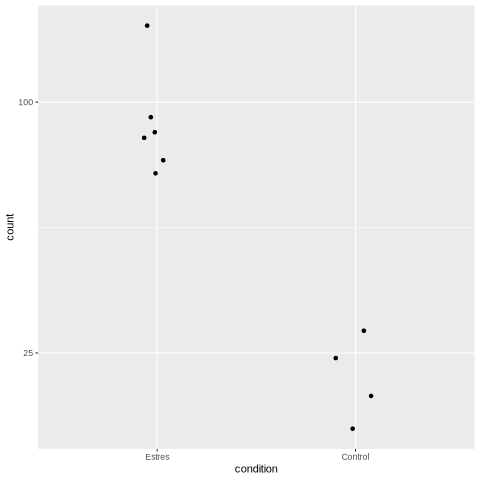

In [105]:
%%R
d <- plotCounts(dse, gene=which.min(res$padj), intgroup="condition", 
                returnData=TRUE)
library("ggplot2")
ggplot(d, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

In [106]:
%%R
vsd <- vst(dse, blind=FALSE)
rld <- rlog(dse, blind=FALSE)
ntd <- normTransform(dds)
head(assay(vsd), 3)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]       3.844263       3.844263       3.844263   3.844263   3.844263
[2,]       3.844263       3.844263       3.844263   3.844263   3.844263
[3,]       6.472297       6.021508       5.897841   5.388561   6.048967
     ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1 estres_N7_XT17_R2
[1,]        3.844263        3.844263          3.844263          3.844263
[2,]        4.377502        3.844263          3.844263          3.844263
[3,]        5.745710        5.961402          5.663704          5.913724
     estres_N7_XT17_R3
[1,]          3.844263
[2,]          3.844263
[3,]          5.641502


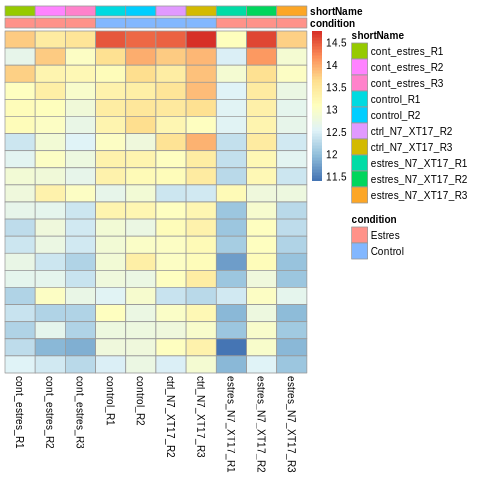

In [107]:
%%R
library("pheatmap")
select <- order(rowMeans(counts(dse,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dse)[,c("condition","shortName")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

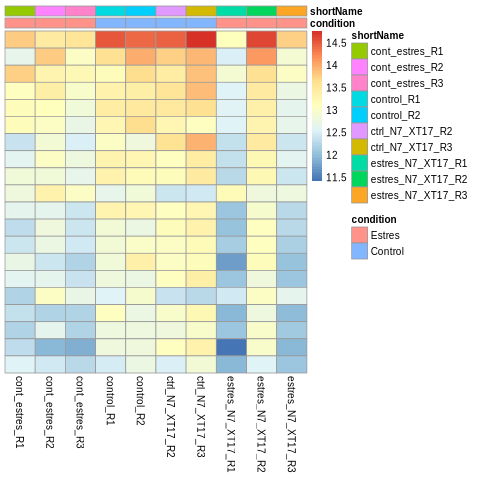

In [108]:
%%R

pheatmap(assay(vsd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

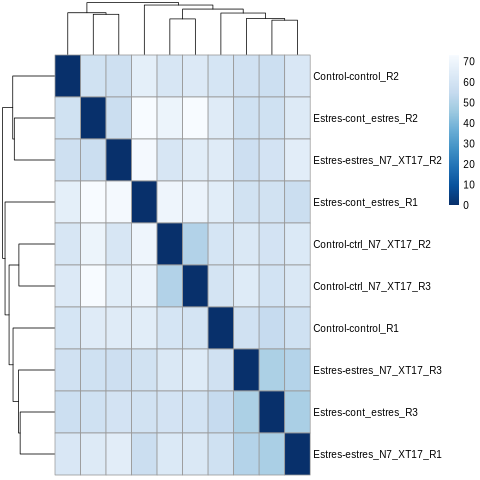

In [109]:
%%R
sampleDists <- dist(t(assay(vsd))) 
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$shortName, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [110]:
%%R
dim(data)

[1] 22532    12


In [111]:
%%R
total <- merge(data, normed, by=0)
total = total[with(total, order(PValue, -foldChange)), ]
head(total)

      Row.names                       name  baseMean log2FoldChange     lfcSE
3424      13079 AVESA.00001b.r3.4Ag0003021  63.52202      -2.072057 0.3025930
13582     22220 AVESA.00001b.r3.3Ag0001998  86.42582      -1.513330 0.2246977
9430      18485 AVESA.00001b.r3.6Ag0001706 198.08755      -1.472238 0.2267753
1722      11547 AVESA.00001b.r3.4Ag0001489 118.63819       1.370497 0.2199462
7774      16995 AVESA.00001b.r3.6Ag0000216 261.15084       2.166673 0.3761608
1465      11315 AVESA.00001b.r3.4Ag0001257 143.56178       1.595630 0.2841412
           stat       PValue          FDR foldChange         PAdj     falsePos
3424  -6.847670 7.506252e-12 4.688405e-08  0.2378202 1.430767e-07 4.688405e-08
13582 -6.734963 1.639719e-11 5.120843e-08  0.3503016 3.125305e-07 1.024169e-07
9430  -6.492057 8.467220e-11 1.762875e-07  0.3604227 1.613767e-06 5.288625e-07
1722   6.231054 4.633081e-10 7.234556e-07  2.5855957 8.829726e-06 2.893823e-06
7774   5.759965 8.413155e-09 1.050971e-05  4.4898675 1.6032

In [112]:
%%R
col_names_A = data.frame(split(colData, colData$condition)[1])[,1]
col_names_B = data.frame(split(colData, colData$condition)[2])[,1]

total$baseMeanA = rowMeans(total[, col_names_A])
total$baseMeanB = rowMeans(total[, col_names_B])

total$foldChange = round(total$foldChange, 3)
total$log2FoldChange = round(total$log2FoldChange, 1)
total$baseMean  = round(total$baseMean, 1)
total$baseMeanA = round(total$baseMeanA, 1)
total$baseMeanB =  round(total$baseMeanB, 1)
total$lfcSE = round(total$lfcSE, 2)
total$stat = round(total$stat, 2)
total$FDR = round(total$FDR, 4)
total$falsePos = round(total$falsePos, 0)

total$PAdj = formatC(total$PAdj, format = "e", digits = 1)
total$PValue = formatC(total$PValue, format = "e", digits = 1)

In [113]:
%%R
head(total)

      Row.names                       name baseMean log2FoldChange lfcSE  stat
3424      13079 AVESA.00001b.r3.4Ag0003021     63.5           -2.1  0.30 -6.85
13582     22220 AVESA.00001b.r3.3Ag0001998     86.4           -1.5  0.22 -6.73
9430      18485 AVESA.00001b.r3.6Ag0001706    198.1           -1.5  0.23 -6.49
1722      11547 AVESA.00001b.r3.4Ag0001489    118.6            1.4  0.22  6.23
7774      16995 AVESA.00001b.r3.6Ag0000216    261.2            2.2  0.38  5.76
1465      11315 AVESA.00001b.r3.4Ag0001257    143.6            1.6  0.28  5.62
       PValue FDR foldChange    PAdj falsePos baseMeanA baseMeanB
3424  7.5e-12   0      0.238 1.4e-07        0      91.4      21.7
13582 1.6e-11   0      0.350 3.1e-07        0     116.7      41.1
9430  8.5e-11   0      0.360 1.6e-06        0     266.1      96.1
1722  4.6e-10   0      2.586 8.8e-06        0      72.5     187.8
7774  8.4e-09   0      4.490 1.6e-04        0     109.0     489.4
1465  2.0e-08   0      3.022 3.7e-04        0      

In [114]:
%%R
names(otherCols)

[1] "name"


In [115]:
%%R
#colnames(total)[1] <- "name"

new_cols = c("name", "baseMean","baseMeanA","baseMeanB","foldChange",
             "log2FoldChange","lfcSE","stat","PValue","PAdj", "FDR","falsePos",col_names_A, col_names_B)

total = total[, new_cols]

head(total)

                            name baseMean baseMeanA baseMeanB foldChange
3424  AVESA.00001b.r3.4Ag0003021     63.5      91.4      21.7      0.238
13582 AVESA.00001b.r3.3Ag0001998     86.4     116.7      41.1      0.350
9430  AVESA.00001b.r3.6Ag0001706    198.1     266.1      96.1      0.360
1722  AVESA.00001b.r3.4Ag0001489    118.6      72.5     187.8      2.586
7774  AVESA.00001b.r3.6Ag0000216    261.2     109.0     489.4      4.490
1465  AVESA.00001b.r3.4Ag0001257    143.6      79.5     239.7      3.022
      log2FoldChange lfcSE  stat  PValue    PAdj FDR falsePos cont_estres_R1
3424            -2.1  0.30 -6.85 7.5e-12 1.4e-07   0        0          152.1
13582           -1.5  0.22 -6.73 1.6e-11 3.1e-07   0        0          125.9
9430            -1.5  0.23 -6.49 8.5e-11 1.6e-06   0        0          287.9
1722             1.4  0.22  6.23 4.6e-10 8.8e-06   0        0           74.4
7774             2.2  0.38  5.76 8.4e-09 1.6e-04   0        0          116.0
1465             1.6  0.28 

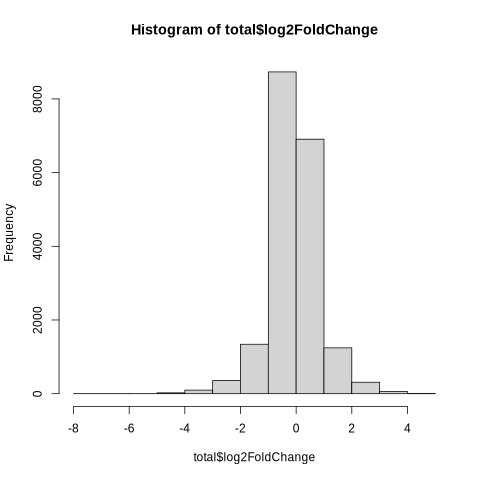

In [116]:
%%R
hist(total$log2FoldChange)

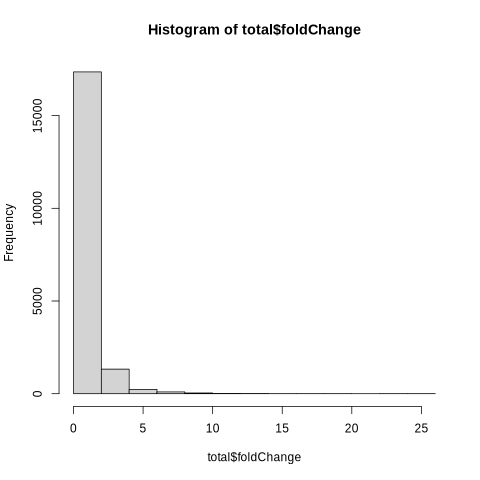

In [117]:
%%R
hist(total$foldChange)

In [118]:
%%R
dim(total)

[1] 22532    22


In [119]:
%%R
write.csv(total, file= "05-featureCounts/results-filtered.csv", row.names=FALSE, quote=FALSE)

In [120]:
%%R

MIN_FDR = 0.05

WIDTH = 15
HEIGHT = 16
MARGINS = c(9, 12)
LHEI = c(1, 5)

data = subset(total, data$FDR <= MIN_FDR)

head(data)

                            name baseMean baseMeanA baseMeanB foldChange
3424  AVESA.00001b.r3.4Ag0003021     63.5      91.4      21.7      0.238
13582 AVESA.00001b.r3.3Ag0001998     86.4     116.7      41.1      0.350
9430  AVESA.00001b.r3.6Ag0001706    198.1     266.1      96.1      0.360
1722  AVESA.00001b.r3.4Ag0001489    118.6      72.5     187.8      2.586
7774  AVESA.00001b.r3.6Ag0000216    261.2     109.0     489.4      4.490
1465  AVESA.00001b.r3.4Ag0001257    143.6      79.5     239.7      3.022
      log2FoldChange lfcSE  stat  PValue    PAdj FDR falsePos cont_estres_R1
3424            -2.1  0.30 -6.85 7.5e-12 1.4e-07   0        0          152.1
13582           -1.5  0.22 -6.73 1.6e-11 3.1e-07   0        0          125.9
9430            -1.5  0.23 -6.49 8.5e-11 1.6e-06   0        0          287.9
1722             1.4  0.22  6.23 4.6e-10 8.8e-06   0        0           74.4
7774             2.2  0.38  5.76 8.4e-09 1.6e-04   0        0          116.0
1465             1.6  0.28 

In [121]:
%%R
row_names = data[, 1]
idx = which(colnames(data) == "falsePos") + 1

counts = data[, idx : ncol(data)]
values = as.matrix(counts)
values = jitter(values, factor = 1, amount = 0.00001)
head(values)

      cont_estres_R1 cont_estres_R2 cont_estres_R3 estres_N7_XT17_R1
3424       152.10000       66.99999       81.60001          91.50001
13582      125.89999      107.40001      100.50000         146.80001
9430       287.89999      252.20000      231.90000         316.39999
1722        74.40000       63.09999       53.29999          71.79999
7774       116.00000       51.19999      170.90001          59.20000
1465        85.39999       59.10000       85.00000          73.40001
      estres_N7_XT17_R2 estres_N7_XT17_R3 control_R1 control_R2 ctrl_N7_XT17_R2
3424           84.20001              72.0       19.2       27.8        23.79999
13582          98.39999             121.1       55.4       35.3        35.70000
9430          220.79999             287.3      104.0      129.3        98.20000
1722           72.10001             100.5      160.5      229.7       212.40001
7774          133.40001             123.5      394.6      213.7       430.70001
1465          106.00000              

In [122]:
%%R
zscores = NULL
for (i in 1 : nrow(values)) {
  row = values[i,]
  zrow = (row - mean(row)) / sd(row)
  zscores = rbind(zscores, zrow)
}

row.names(zscores) = row_names

zscores = as.matrix(zscores)

head(zscores)

                           cont_estres_R1 cont_estres_R2 cont_estres_R3
AVESA.00001b.r3.4Ag0003021      2.0660378     0.08116722      0.4216977
AVESA.00001b.r3.3Ag0001998      0.9450386     0.50197717      0.3367269
AVESA.00001b.r3.6Ag0001706      0.9570672     0.57662746      0.3602989
AVESA.00001b.r3.4Ag0001489     -0.6828608    -0.85728074     -1.0085474
AVESA.00001b.r3.6Ag0000216     -0.5485970    -0.79349292     -0.3411158
AVESA.00001b.r3.4Ag0001257     -0.5545205    -0.80523185     -0.5583335
                           estres_N7_XT17_R1 estres_N7_XT17_R2
AVESA.00001b.r3.4Ag0003021         0.6526050         0.4823400
AVESA.00001b.r3.3Ag0001998         1.4455790         0.2864333
AVESA.00001b.r3.6Ag0001706         1.2607797         0.2420108
AVESA.00001b.r3.4Ag0001489        -0.7229930        -0.7183621
AVESA.00001b.r3.6Ag0000216        -0.7632588        -0.4828379
AVESA.00001b.r3.4Ag0001257        -0.6689134        -0.3581456
                           estres_N7_XT17_R3 control_R1

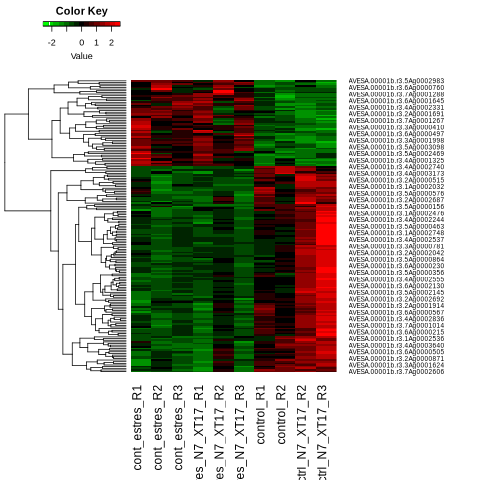

In [123]:
%%R

suppressPackageStartupMessages(library(gplots))
col = greenred


heatmap.2(zscores, col=col, density.info="none", Colv=NULL,
    dendrogram="row", trace="none", margins=MARGINS, lhei=LHEI)

In [124]:
%%R
dim(zscores)

[1] 177  10


In [125]:
%%R

library("pheatmap")
library("RColorBrewer")

g <- pheatmap(zscores,color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100),
              border_color = "grey60",
              #scale = "none", 
              cluster_rows = TRUE, 
              cluster_cols = TRUE,
              fontsize_row = 5, 
              fontsize_col = 6, 
              clustering_distance_rows = "correlation",
              clustering_method = "complete", 
              angle_col = c("90"),
              #cellwidth = 5, 
              #cellheight = 5
              width = 10,
              height = 15,
              filename = "heatmap-filtered.pdf"
             )

g

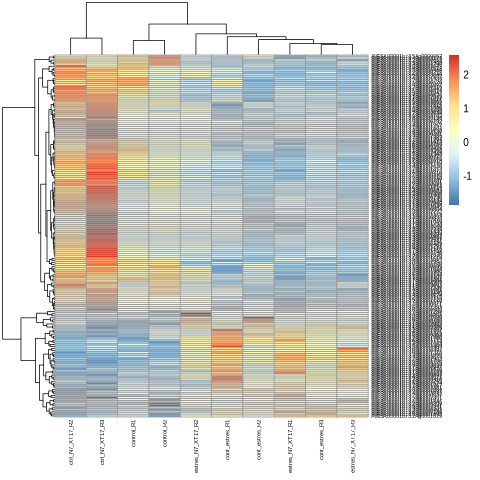

In [126]:
%%R
g

In [127]:
%%R
resultsNames(dse)

[1] "Intercept"                   "condition_Control_vs_Estres"


In [128]:
%%R
resLFC <- lfcShrink(dse, coef="condition_Control_vs_Estres", type="apeglm")
resLFC

log2 fold change (MAP): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 5 columns
       baseMean log2FoldChange     lfcSE    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA
2      0.198459     0.00758482  0.165140 0.6208414        NA
3     34.686100    -0.04908058  0.155878 0.4675454  0.826418
4      0.000000             NA        NA        NA        NA
5     86.572550    -0.18011189  0.230399 0.0703612  0.416301
...         ...            ...       ...       ...       ...
22528   8.67159     -0.0249579  0.159829  0.599925        NA
22529  12.01408      0.0386744  0.162037  0.454579        NA
22530  11.40207      0.0230964  0.156603  0.673282        NA
22531   7.06532      0.0445566  0.165127  0.368147        NA
22532  16.23221      0.0590530  0.163924  0.351479        NA


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [129]:
%%R
library("BiocParallel")
register(MulticoreParam(4))

In [130]:
%%R
resOrdered <- res[order(res$pvalue),]

In [131]:
%%R
summary(res)


out of 19082 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 188, 0.99%
LFC < 0 (down)     : 83, 0.43%
outliers [1]       : 21, 0.11%
low counts [2]     : 12815, 67%
(mean count < 17)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [132]:
%%R
summary(results(dse, alpha=0.05))


out of 19082 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 117, 0.61%
LFC < 0 (down)     : 56, 0.29%
outliers [1]       : 21, 0.11%
low counts [2]     : 9158, 48%
(mean count < 7)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



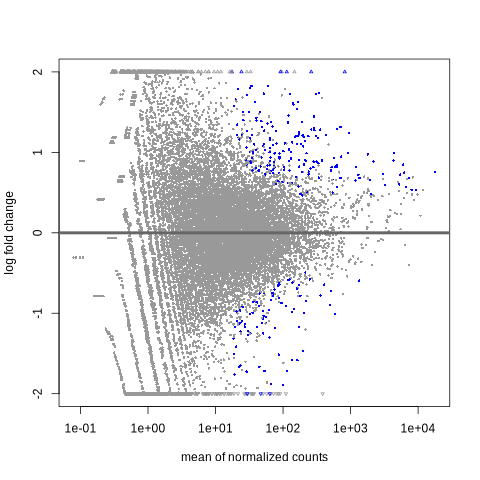

In [133]:
%%R
plotMA(res, ylim=c(-2,2))

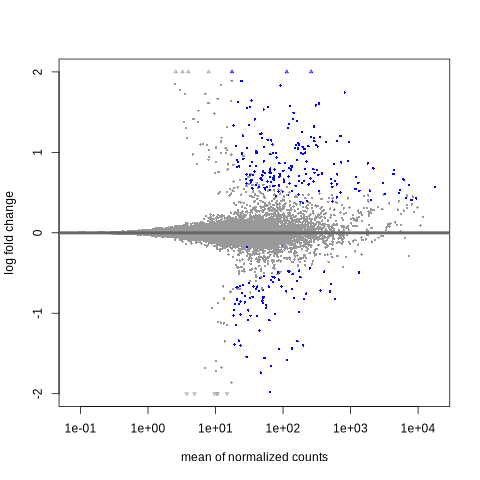

In [134]:
%%R
plotMA(resLFC, ylim=c(-2,2))

NULL


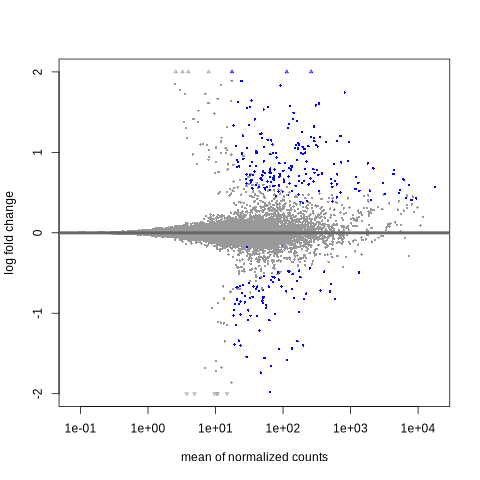

In [136]:
%%R
plotMA(resLFC, ylim=c(-2,2))
idx <- identify(res$baseMean, res$log2FoldChange)
rownames(res)[idx]

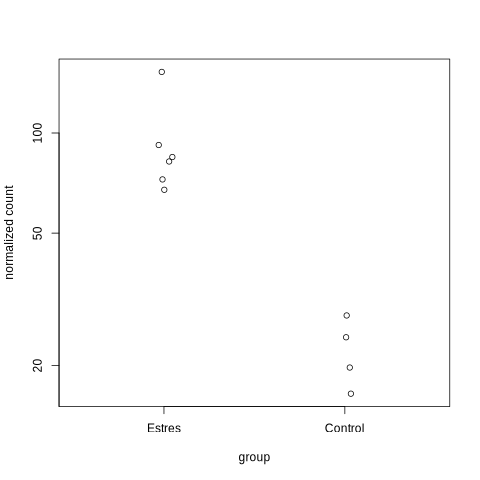

In [137]:
%%R
plotCounts(dse, gene=which.min(res$padj), intgroup="condition")